# classifier

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
## lets create synthetic data points
from sklearn.datasets import make_classification

In [139]:
x,y= make_classification(n_samples=1000, n_classes=2, n_features=2, 
                         n_redundant=0, 
                         n_clusters_per_class=1)

In [140]:
pd.DataFrame(x)[0]

0      0.798730
1      1.475393
2     -1.147222
3     -1.058146
4     -0.976133
         ...   
995   -0.882506
996    1.455873
997   -1.182977
998   -1.145523
999   -1.068394
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

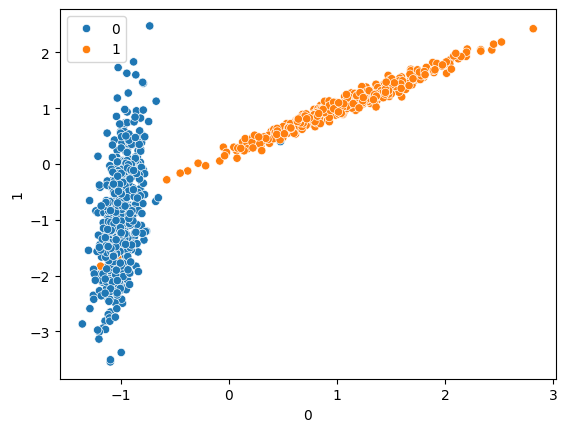

In [141]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [143]:
from sklearn.svm import SVC

In [144]:
svc = SVC( kernel='linear')

In [145]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [146]:
# prediction

y_pred = svc.predict(x_test)

In [147]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [149]:
print(accuracy_score(y_test, y_pred))


0.9933333333333333


In [150]:
print(confusion_matrix(y_test, y_pred))

[[155   0]
 [  2 143]]


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       155
           1       1.00      0.99      0.99       145

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [152]:
rbf = SVC(kernel='rbf')

In [153]:
rbf.fit(x_train, y_train)

SVC()

In [155]:
y_pred1 = rbf.predict(x_test)


In [156]:
print(accuracy_score(y_test, y_pred1))

0.9933333333333333


In [157]:
print(confusion_matrix(y_test, y_pred1))

[[155   0]
 [  2 143]]


In [158]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       155
           1       1.00      0.99      0.99       145

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [159]:
poly = SVC(kernel='poly')

In [160]:
poly.fit(x_train, y_train)

SVC(kernel='poly')

In [161]:
y_pred2 = poly.predict(x_test)

In [162]:
print(accuracy_score(y_test, y_pred2))

1.0


In [163]:
print(confusion_matrix(y_test, y_pred2))

[[155   0]
 [  0 145]]


In [164]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       145

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# hyperparameter tuning with svc

In [165]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear', 'poly']
}

In [167]:
grid = GridSearchCV(SVC(), parameters, refit = True, verbose=3)

In [168]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [169]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [170]:
y_pred3 = grid.predict(x_test)

In [171]:
print(accuracy_score(y_test, y_pred3))

0.9933333333333333


In [172]:
print(confusion_matrix(y_test, y_pred3))

[[155   0]
 [  2 143]]


In [173]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       155
           1       1.00      0.99      0.99       145

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

